In [1]:
import torch
import matplotlib.pyplot as plt
import config

import sys
sys.path.append(config.root_path)

from Trainer import Trainer
from util import *
from unets_classic import *
from MobileNetV2 import *

from foot_dataset import *

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [2]:
in_channels            = 3
num_classes            = 1
info_dataset_resolution=224
info_dataset_image_size=224
info_dataset_batch_size=8
train_loader, test_loader, val_loader = get_foot_datasets(dataset_dir=config.medetec_dataset_path, 
                                                resolution=info_dataset_resolution, 
                                                batch_size=info_dataset_batch_size, 
                                                augmented=True)

In [3]:
for (images_train, masks_train), (images_test, masks_test) in zip(train_loader, test_loader):
    print(images_train.shape, masks_train.shape)
    break

torch.Size([8, 3, 224, 224]) torch.Size([8, 1, 224, 224])


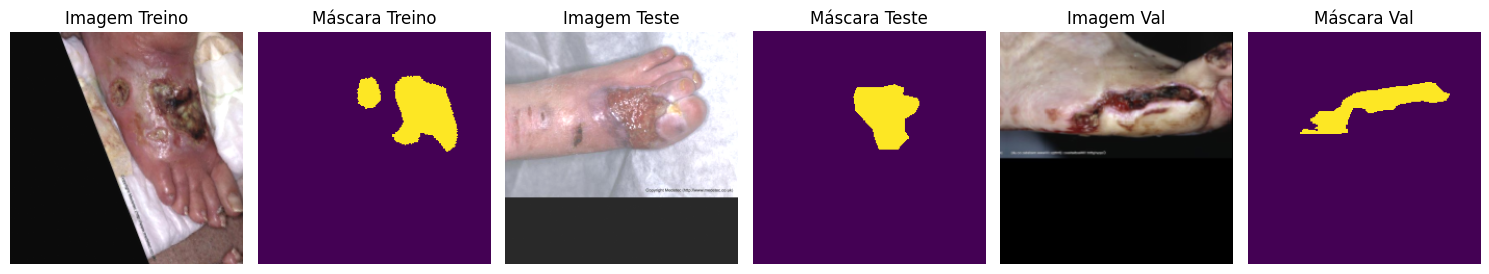

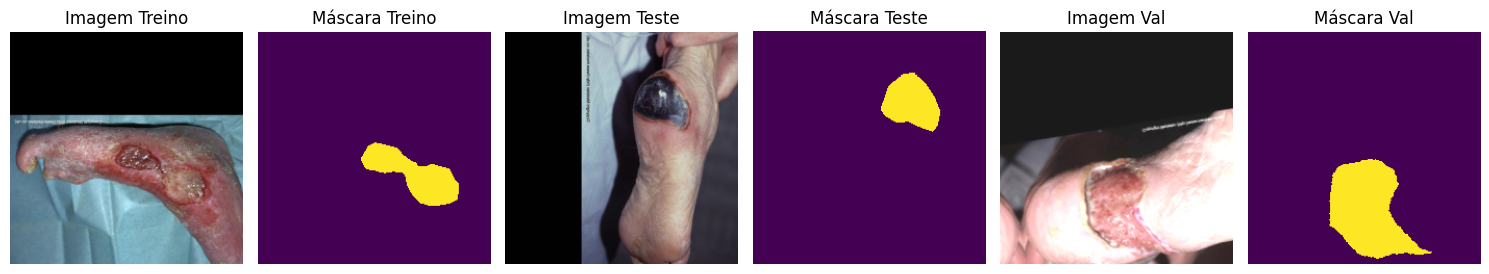

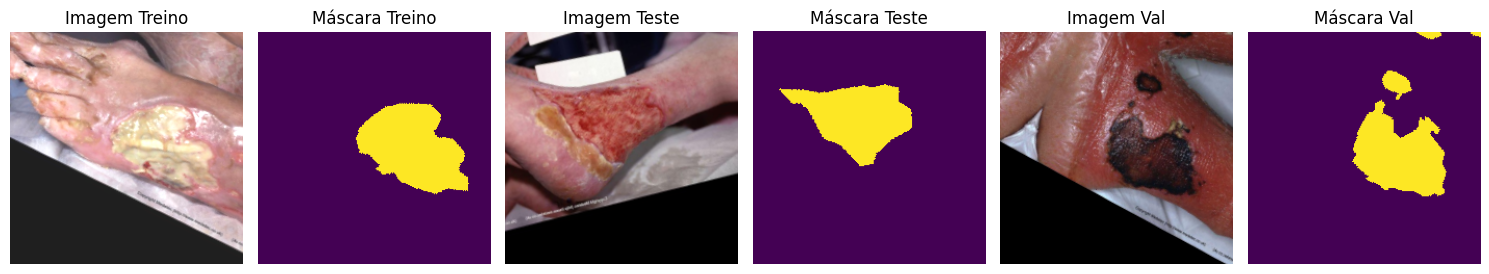

In [4]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [5]:
epochs       = 300
model_name   = 'u-net-classic-aug'
path         = 'u-net-CIARP'

In [6]:
unet_size = 'P'
model = getUnetClassic(unet_size, in_channels=in_channels, out_channels=num_classes)
model_filename = f'{model_name}-Medetec-{unet_size}-epochs{epochs}.pth'
trainer = Trainer(model_filename, 
                  model_dir=path, 
                  info={'u-net_size':unet_size},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 1941105
Parando na época 49 por early stopping. 0.3918 Dice: 0.7950 mIoU: 0.6909 IoU: 0.6885 Precision: 0.8355 Recall: 0.7944 Q: 0.5500 Tempo total: 00:02:29 LR:0.000500

Melhor modelo:
 Epoch [29/300] - Loss: 0.0833 Val Loss: 0.1843 Dice: 0.8196 mIoU: 0.7218 IoU: 0.7221 Precision: 0.8621 Recall: 0.8141 Q: 0.5938 Tempo total: 00:01:29 LR:0.001000
Ultimo modelo:
 Epoch [49/300] - Loss: 0.0233 Val Loss: 0.3918 Dice: 0.7950 mIoU: 0.6909 IoU: 0.6885 Precision: 0.8355 Recall: 0.7944 Q: 0.5500 Tempo total: 00:02:29 LR:0.000500 FPS: 811.89
Saved as u-net-CIARP/u-net-classic-aug-Medetec-P-epochs300.pth
u-net-CIARP/outputs/sample0-u-net-classic-aug-Medetec-P-epochs300.png saved.
u-net-CIARP/outputs/sample1-u-net-classic-aug-Medetec-P-epochs300.png saved.
u-net-CIARP/outputs/sample2-u-net-classic-aug-Medetec-P-epochs300.png saved.
u-net-CIARP/outputs/sample3-u-net-classic-aug-Medetec-P-epochs300.png saved.
u-net-CIARP/outputs/sample4-u-net-classic-aug-Medetec-P-epochs300.pn

In [7]:

model = getDeepLabV3_MobileNetV2(num_classes)

model_name     = 'MobileNetV2'
path           = model_name
model_filename = f'{model_name}-Medetec-epochs{epochs}.pth'
trainer = MobileNetV2Trainer(model_filename, 
                  model_dir=path, 
                  info={'weights':'DEFAULT'},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 12647937
Parando na época 67 por early stopping. 0.0882 Dice: 0.9143 mIoU: 0.8514 IoU: 0.8496 Precision: 0.9104 Recall: 0.9226 Q: 0.7799 Tempo total: 00:04:06 LR:0.000500

Melhor modelo:
 Epoch [47/300] - Loss: 0.0382 Val Loss: 0.0762 Dice: 0.9221 mIoU: 0.8636 IoU: 0.8591 Precision: 0.9179 Recall: 0.9286 Q: 0.7976 Tempo total: 00:02:55 LR:0.001000
Ultimo modelo:
 Epoch [67/300] - Loss: 0.0379 Val Loss: 0.0882 Dice: 0.9143 mIoU: 0.8514 IoU: 0.8496 Precision: 0.9104 Recall: 0.9226 Q: 0.7799 Tempo total: 00:04:06 LR:0.000500 FPS: 1110.11
Saved as MobileNetV2/MobileNetV2-Medetec-epochs300.pth
MobileNetV2/outputs/sample0-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample1-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample2-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample3-MobileNetV2-Medetec-epochs300.png saved.
MobileNetV2/outputs/sample4-MobileNetV2-Medetec-epochs300.png saved.


# FUSeg dataset

In [8]:
train_loader, test_loader, val_loader = get_foot_datasets(dataset_dir=config.fuseg_dataset_path, 
                                                resolution=info_dataset_resolution, 
                                                batch_size=info_dataset_batch_size, 
                                                augmented=True)

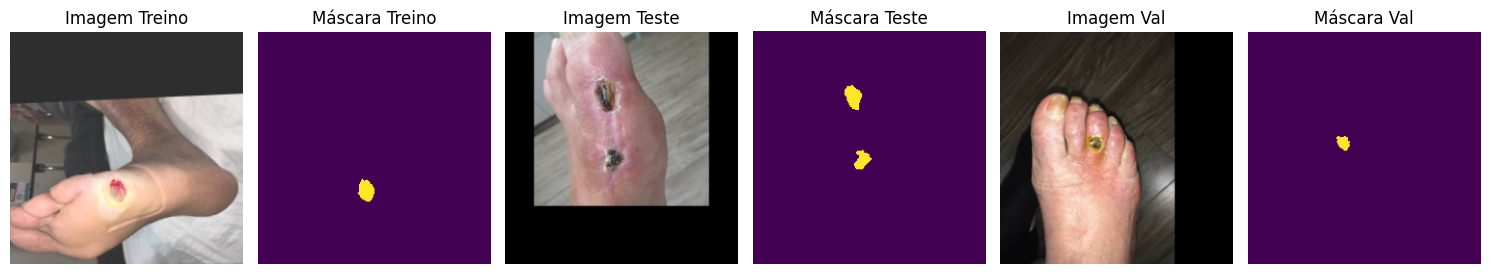

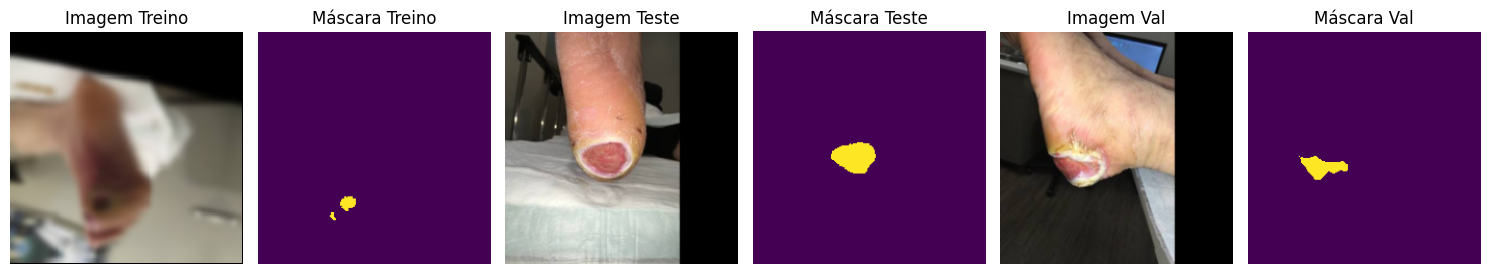

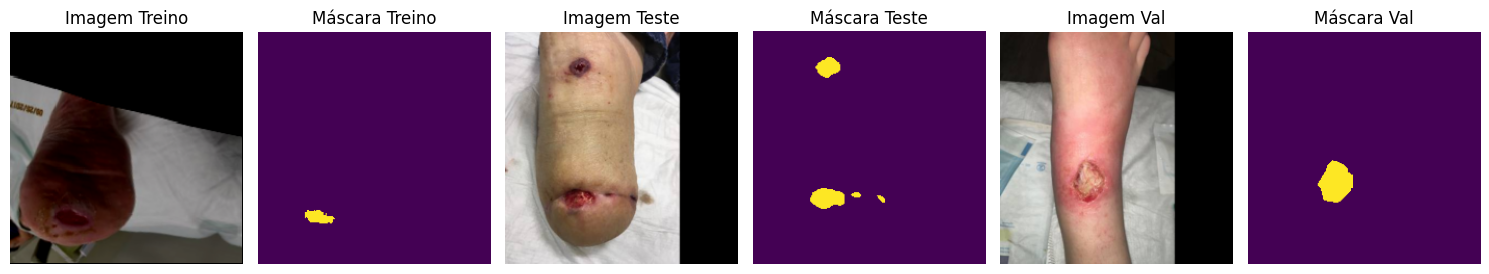

In [9]:
show_dataset_prev(train_loader, test_loader, val_loader, num_images=3)

In [ ]:
unet_size    = 'P'
model_name   = 'u-net-classic-aug'
path         = 'u-net-CIARP'
model = getUnetClassic(unet_size, in_channels=in_channels, out_channels=num_classes)
model_filename = f'{model_name}-FUSeg-{unet_size}-epochs{epochs}.pth'
trainer = Trainer(model_filename, 
                  model_dir=path, 
                  info={'u-net_size':unet_size},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 1941105
Parando na época 94 por early stopping. 0.0112 Dice: 0.9368 mIoU: 0.8893 IoU: 0.8684 Precision: 0.9411 Recall: 0.9349 Q: 0.8341 Tempo total: 00:54:55 LR:0.000250

Melhor modelo:
 Epoch [74/300] - Loss: 0.0047 Val Loss: 0.0089 Dice: 0.9406 mIoU: 0.8950 IoU: 0.8679 Precision: 0.9502 Recall: 0.9337 Q: 0.8426 Tempo total: 00:43:13 LR:0.000500
Ultimo modelo:
 Epoch [94/300] - Loss: 0.0035 Val Loss: 0.0112 Dice: 0.9368 mIoU: 0.8893 IoU: 0.8684 Precision: 0.9411 Recall: 0.9349 Q: 0.8341 Tempo total: 00:54:55 LR:0.000250 FPS: 804.48
Saved as MobileNetV2/MobileNetV2-FUSeg-P-epochs300.pth
MobileNetV2/outputs/sample0-MobileNetV2-FUSeg-P-epochs300.png saved.
MobileNetV2/outputs/sample1-MobileNetV2-FUSeg-P-epochs300.png saved.
MobileNetV2/outputs/sample2-MobileNetV2-FUSeg-P-epochs300.png saved.
MobileNetV2/outputs/sample3-MobileNetV2-FUSeg-P-epochs300.png saved.
MobileNetV2/outputs/sample4-MobileNetV2-FUSeg-P-epochs300.png saved.


In [11]:


model = getDeepLabV3_MobileNetV2(num_classes)

model_name     = 'MobileNetV2'
path           = model_name
model_filename = f'{model_name}-FUSeg-epochs{epochs}.pth'
trainer = MobileNetV2Trainer(model_filename, 
                  model_dir=path, 
                  info={'weights':'DEFAULT'},
                  save_xlsx=True)
model = trainer.train(model, train_loader, val_loader, test_loader,
                        num_epochs=epochs, 
                        save_every=1, 
                        save_outputs_every=25,
                        continue_from_last=True,
                        learning_rate=1e-3,
                        verbose=1)
model.to(device)
trainer.save_sample_output(test_loader,[0,1,2,3,4])
del model
clear_gpu()


trainable_parameters: 12647937
Parando na época 67 por early stopping. 0.0126 Dice: 0.8644 mIoU: 0.7920 IoU: 0.7208 Precision: 0.8924 Recall: 0.8449 Q: 0.6885 Tempo total: 00:37:48 LR:0.000250

Melhor modelo:
 Epoch [47/300] - Loss: 0.0119 Val Loss: 0.0129 Dice: 0.8652 mIoU: 0.7931 IoU: 0.7210 Precision: 0.8960 Recall: 0.8431 Q: 0.6902 Tempo total: 00:26:35 LR:0.000500
Ultimo modelo:
 Epoch [67/300] - Loss: 0.0113 Val Loss: 0.0126 Dice: 0.8644 mIoU: 0.7920 IoU: 0.7208 Precision: 0.8924 Recall: 0.8449 Q: 0.6885 Tempo total: 00:37:48 LR:0.000250 FPS: 1060.90
Saved as MobileNetV2/MobileNetV2-FUSeg-epochs300.pth
MobileNetV2/outputs/sample0-MobileNetV2-FUSeg-epochs300.png saved.
MobileNetV2/outputs/sample1-MobileNetV2-FUSeg-epochs300.png saved.
MobileNetV2/outputs/sample2-MobileNetV2-FUSeg-epochs300.png saved.
MobileNetV2/outputs/sample3-MobileNetV2-FUSeg-epochs300.png saved.
MobileNetV2/outputs/sample4-MobileNetV2-FUSeg-epochs300.png saved.
